In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [28]:
df =pd.read_csv("student_score.csv",encoding ="unicode_escape")

In [29]:
df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,10-May,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,10-May,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,10-May,76,78,75


In [30]:
df.shape

(30641, 15)

In [31]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [33]:
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [34]:
df = df.drop("Unnamed: 0" , axis = 1)

In [35]:
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,10-May,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,10-May,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,10-May,76,78,75


## Change weekly study hours column 

In [36]:
df['WklyStudyHours'] = df['WklyStudyHours'].str.replace('10-May','5-10')
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5-10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5-10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5-10,76,78,75


## Gender Distribution

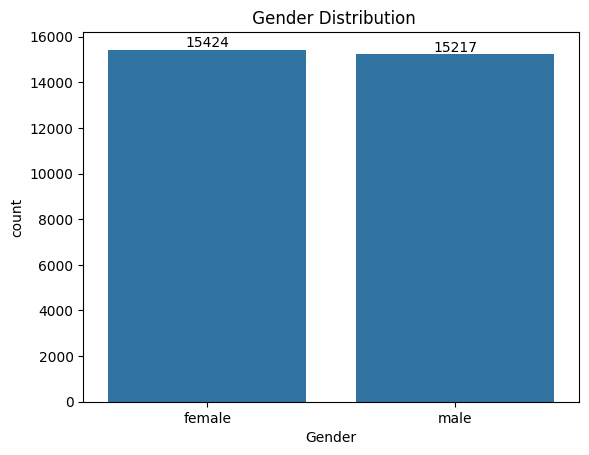

In [37]:
plt.title(" Gender Distribution")
ax = sns.countplot(data=df , x ="Gender")

for bars in ax.containers: 
    ax.bar_label(bars)             

### from the above chart we have analysed that the ( No. of Females is more than No. of Males

In [38]:
gb = df.groupby('ParentEduc').agg({'MathScore':"mean" ,'ReadingScore':"mean" ,'WritingScore':"mean"})
print(gb)

                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.365586     71.124324     70.299099
bachelor's degree   70.466627     73.062020     73.331069
high school         64.435731     67.213997     65.421136
master's degree     72.336134     75.832921     76.356896
some college        66.390472     69.179708     68.501432
some high school    62.584013     65.510785     63.632409


<Axes: title={'center': 'Impact ParentEduc. in Student Score'}, ylabel='ParentEduc'>

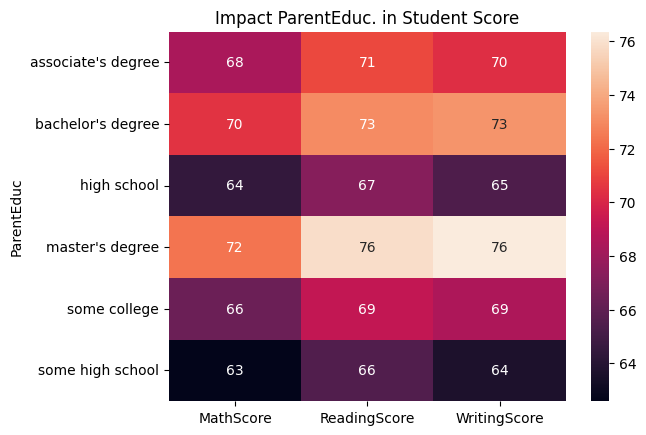

In [39]:
plt.title("Impact ParentEduc. in Student Score")
sns.heatmap(gb, annot=True)

### from the above chart we have concluded that the education of the parents have a good impact on their Scores

In [40]:
gb1 = df.groupby('ParentMaritalStatus').agg({'MathScore':"mean" ,'ReadingScore':"mean" ,'WritingScore':"mean"})
print(gb1)

                     MathScore  ReadingScore  WritingScore
ParentMaritalStatus                                       
divorced             66.691197     69.655011     68.799146
married              66.657326     69.389575     68.420981
single               66.165704     69.157250     68.174440
widowed              67.368866     69.651438     68.563452


Text(0.5, 1.0, 'Impact Maretial Status on Student Score')

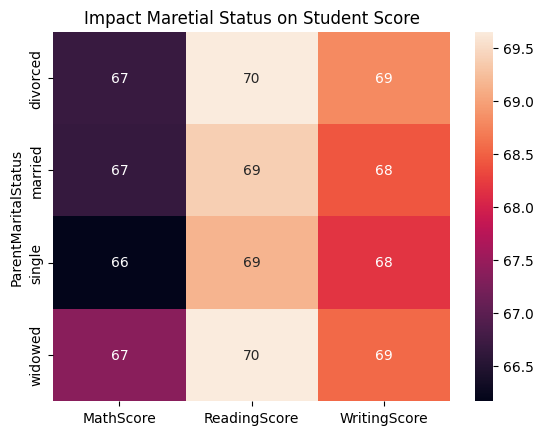

In [41]:
sns.heatmap(gb1, annot=True)
plt.title('Impact Maretial Status on Student Score')

#### from the above chart we have concluded that their are a no impact on the student score due to their ParentMaritalStatus.

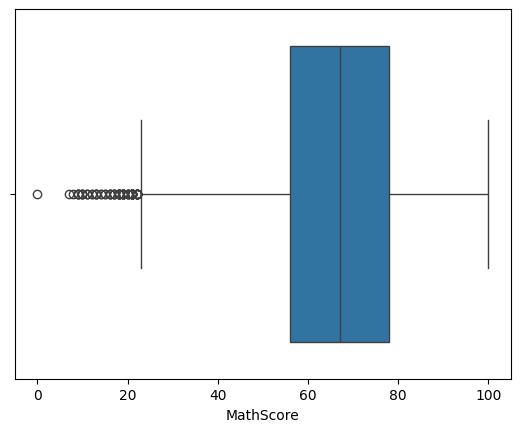

In [42]:
sns.boxplot(data = df ,x='MathScore')
plt.show()

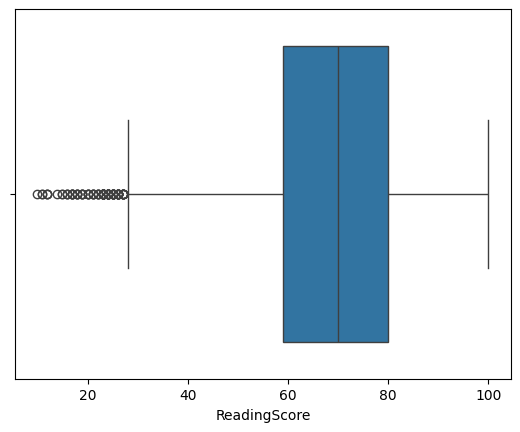

In [43]:
sns.boxplot(data = df ,x='ReadingScore')
plt.show()

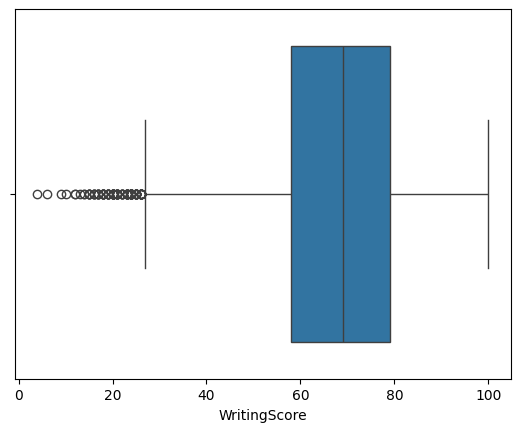

In [44]:
sns.boxplot(data = df ,x='WritingScore')
plt.show()

In [45]:
print(df['EthnicGroup'].unique())

[nan 'group C' 'group B' 'group A' 'group D' 'group E']


## Distribution of Ethnic Groups

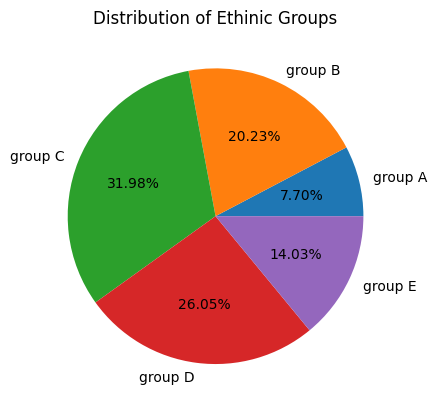

In [46]:
groupA = df.loc[(df['EthnicGroup'] == 'group A')].count()
groupB = df.loc[(df['EthnicGroup'] == 'group B')].count()
groupC = df.loc[(df['EthnicGroup'] == 'group C')].count()
groupD = df.loc[(df['EthnicGroup'] == 'group D')].count()
groupE = df.loc[(df['EthnicGroup'] == 'group E')].count()

l = ['group A','group B','group C','group D','group E']

mlist = [groupA['EthnicGroup'],groupB['EthnicGroup'],groupC['EthnicGroup'],groupD['EthnicGroup'],groupE['EthnicGroup']]
plt.pie(mlist,  labels = l, autopct = "%1.2f%%")

plt.title('Distribution of Ethinic Groups')

plt.show()

In [47]:
gb5 = df.groupby('WklyStudyHours').agg({'MathScore':"mean" ,'ReadingScore':"mean" ,'WritingScore':"mean"})
print(gb)

                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.365586     71.124324     70.299099
bachelor's degree   70.466627     73.062020     73.331069
high school         64.435731     67.213997     65.421136
master's degree     72.336134     75.832921     76.356896
some college        66.390472     69.179708     68.501432
some high school    62.584013     65.510785     63.632409


<Axes: title={'center': 'Impact weeklystudyhours. in Student Score'}, ylabel='WklyStudyHours'>

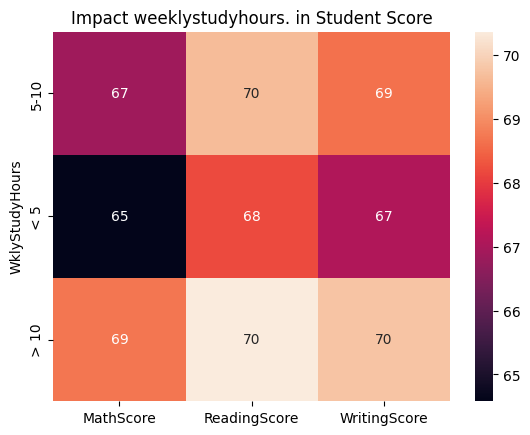

In [48]:
plt.title("Impact weeklystudyhours. in Student Score")
sns.heatmap(gb5, annot=True)

# Conclusion

### from the above we can find the No.of female students are hgh rather then the male.

### Parent Education has a good impact  in their score.

### Negligible impact Parent Maretial status in the Student Score 

### Group C student's are high score rather than other Groups.

### Math Sub. is very week for all Group's  Student.

### Weekly 5-10 hours Student's had a good Score in Math.